In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as st
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [131]:
file_path = './datasets/housing/housingBH2024.csv'
df = pd.read_csv(file_path)

In [132]:
drop_columns = [
    'ID', 'Location', 'Pets Allowed?', 'Furnished?',
    'Total', 'airport', 'amusement_park', 'art_gallery', 'atm', 'bakery', 'bank',
    'bar', 'beauty_salon', 'bus_station', 'cafe', 'car_repair', 'car_wash',
    'church', 'clothing_store', 'convenience_store', 'dentist',
    'department_store', 'doctor', 'electrician', 'electronics_store',
    'fire_station', 'furniture_store', 'gas_station', 'gym', 'hair_care',
    'hardware_store', 'health', 'home_goods_store', 'hospital',
    'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library',
    'liquor_store', 'lodging', 'meal_delivery', 'meal_takeaway',
    'movie_theater', 'moving_company', 'museum', 'night_club', 'painter',
    'park', 'parking', 'pet_store', 'pharmacy', 'physiotherapist',
    'plumber', 'police', 'post_office', 'real_estate_agency', 'restaurant',
    'school', 'shoe_store', 'shopping_mall', 'spa', 'stadium', 'store',
    'subway_station', 'supermarket', 'taxi_stand', 'train_station',
    'university', 'veterinary_care'
]

df.drop(columns=drop_columns, inplace=True)

In [133]:
df.columns

Index(['Lat', 'Long', 'Square Meters', 'Bedrooms', 'Bathrooms',
       'Parking Spaces', 'Rent', 'Condo Fee', 'Property Tax', 'Fire Insurance',
       'Service Tax'],
      dtype='object')

In [134]:
df.head()

,Lat,Long,Square Meters,Bedrooms,Bathrooms,Parking Spaces,Rent,Condo Fee,Property Tax,Fire Insurance,Service Tax
0,-19.880224,-43.932569,50,3,1,1,2000,260,167,27,52
1,-19.916025,-43.927470,55,2,1,1,1700,650,125,23,44
2,-19.940821,-43.915695,70,2,2,2,2830,400,184,38,74
3,-19.892458,-43.931474,14,3,2,4,4000,550,142,54,103
4,-19.889834,-43.980737,48,2,1,1,1700,399,93,23,44


In [135]:
df.dtypes

Lat               float64
Long              float64
Square Meters       int64
Bedrooms            int64
Bathrooms           int64
Parking Spaces      int64
Rent                int64
Condo Fee           int64
Property Tax        int64
Fire Insurance      int64
Service Tax         int64
dtype: object

In [136]:
df['Total'] = df['Rent'] +  df['Condo Fee'] + df['Property Tax'] + df['Fire Insurance'] + df['Service Tax']

In [137]:
df.describe()

,Lat,Long,Square Meters,Bedrooms,Bathrooms,Parking Spaces,Rent,Condo Fee,Property Tax,Fire Insurance,Service Tax,Total
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,-19.903476,-43.956923,45.483146,2.432584,1.759551,1.398876,3314.984270,513.117978,160.224719,45.220225,85.207865,4118.755056
std,0.045882,0.029059,26.565289,0.971156,0.869780,0.994585,2224.721513,475.184419,182.179836,31.503081,57.731999,2752.192635
min,-20.012808,-44.032400,1.000000,1.000000,1.000000,0.000000,500.000000,0.000000,0.000000,7.000000,12.000000,669.000000
25%,-19.938361,-43.980737,19.000000,2.000000,1.000000,1.000000,1900.000000,230.000000,41.250000,26.000000,48.000000,2378.000000
50%,-19.910588,-43.953391,45.500000,2.000000,2.000000,1.000000,2886.500000,360.000000,110.000000,39.000000,74.000000,3338.000000
75%,-19.874091,-43.934879,68.750000,3.000000,2.000000,2.000000,3975.000000,644.250000,205.250000,54.000000,101.000000,4966.000000
max,-19.783972,-43.876547,99.000000,7.000000,6.000000,8.000000,17440.000000,4085.000000,1689.000000,262.000000,451.000000,22066.000000


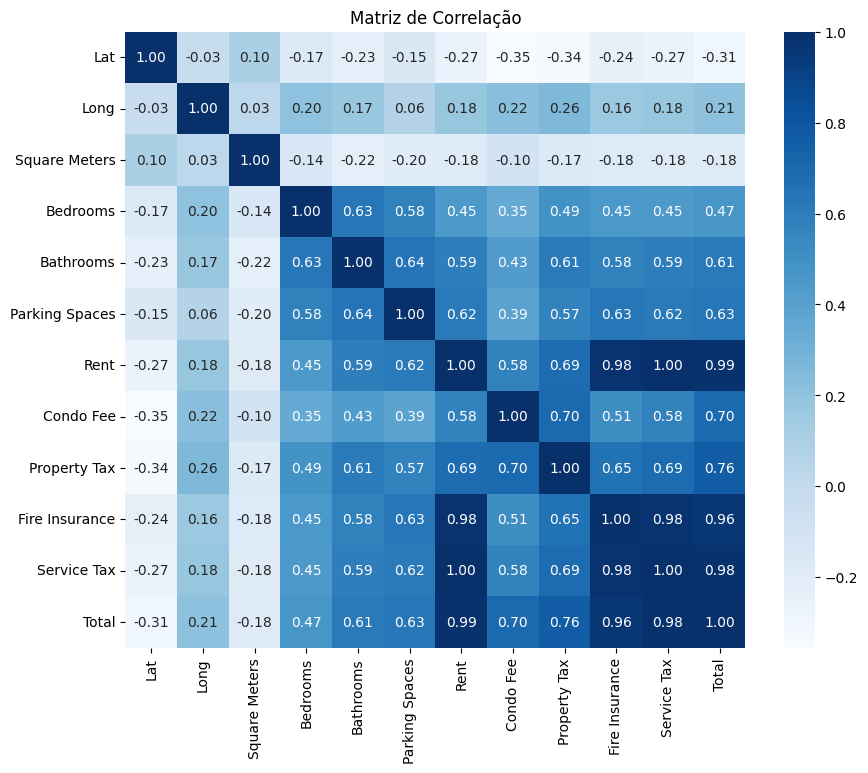

In [138]:
correlation_matdix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matdix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

<font color=orangered>

* corr 0.98 -> Service Tax        // Taxa de serviço da plataforma

* corr 0.96 -> Fire Insurance     // Seguro contra incêndio que inside sobre valor real

* corr 0.76 -> Property Tax       // IPTU, imposto sobre valor da prefeitura

* corr 0.70 -> Condo Fee          

* corr 0.63 -> Parking Spaces

* corr 0.61 -> Bathrooms

</font>

In [189]:
# Modelo de Regressão
def regressao (var_x, var_y):
    # Regressão
    var_x = df[var_x]
    var_x = st.add_constant(var_x)
    var_y = df[var_y]
    results = st.OLS(var_y, var_x).fit()
    intercept = results.params[0]
    beta = results.params[1]
    print(f'Intercepto: {intercept}')
    print(f'Beta: {beta}')

    # Teste Breusch-Pagan
    est, p, f, fp = het_breuschpagan(results.resid, results.model.exog)
    print(f'Teste de Homocedasticidade - p-valor: {p}')

    # Teste de Normalidade
    est_shapiro, p_shapiro = stats.shapiro(results.resid)
    print(f'Teste de Normalidade - p-valor: {p_shapiro}')

    # R2
    r2 = results.rsquared
    print(f'R^2: {r2}')

In [190]:
regressao('Condo Fee', 'Total')

Intercepto: 2032.821717677771
Beta: 4.065211958760136
Teste de Homocedasticidade - p-valor: 2.1533397731348598e-08
Teste de Normalidade - p-valor: 1.8691203621621899e-28
R^2: 0.4926439084082834


/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1]


In [191]:
regressao('Parking Spaces', 'Total')

Intercepto: 1695.9518657407712
Beta: 1731.9637264985674
Teste de Homocedasticidade - p-valor: 5.506190337939338e-13
Teste de Normalidade - p-valor: 8.687814121155015e-29
R^2: 0.3917455511545679


/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1]


In [192]:
regressao('Bathrooms', 'Total')

Intercepto: 699.5717316778228
Beta: 1943.2140222265275
Teste de Homocedasticidade - p-valor: 3.926918388466811e-12
Teste de Normalidade - p-valor: 4.543502580748349e-29
R^2: 0.3771398641873507


/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
/var/folders/2p/j0wj65fx57s89r9fqb_837q40000gn/T/ipykernel_5686/4232821384.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1]
